In [1]:
%pylab inline
import pyclipper

Populating the interactive namespace from numpy and matplotlib


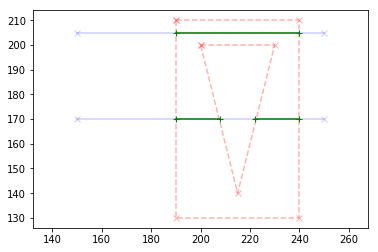

In [48]:
lines = (
    ((150, 170), (250, 170)),
    ((150, 205), (250, 205)),
)
poly = (
    ((190, 210), (240, 210), (240, 130), (190, 130)),
    ((200, 200), (230, 200), (215, 140))
)

pc = pyclipper.Pyclipper()
pc.AddPaths(poly, pyclipper.PT_CLIP, True)
pc.AddPaths(lines, pyclipper.PT_SUBJECT, False)

solution = pc.Execute2(pyclipper.CT_INTERSECTION, pyclipper.PFT_EVENODD, pyclipper.PFT_EVENODD)
assert(solution.depth==1)

figure()
axis('equal')

for path in (np.asarray(_) for _ in lines):
    xx, yy = path.T
    plot(xx,yy,'x-b', alpha=0.2)

for path in (np.asarray(_) for _ in poly):
    xx, yy = path.T
    # close polygon for visual purposes
    xx = np.hstack((xx, xx[0]))
    yy = np.hstack((yy, yy[0]))
    plot(xx,yy,'x--r', alpha=0.3)
    
for child in solution.Childs:
    assert(child.IsOpen)
    xx, yy = np.asarray(child.Contour).T
    plot(xx,yy,'+-g')